In [1]:
import os
import re
from datetime import datetime
from typing import Dict, Optional, List, Iterable, Tuple

import numpy as np
from scipy.io import loadmat
from collections import defaultdict
import matplotlib.pyplot as plt
import random
import pandas as pd

In [2]:
# TODO: Make experiment_rep start from 1 (make dict not list)
class SeedDatasetLoader:
    fs = 200  # 200Hz
    
    def __init__(self, *,
                 preprocessed_eeg_dir="datasets/SEED/Preprocessed_EEG",
                 channel_order_filepath="datasets/SEED/channel-order.xlsx"):
        self.preprocessed_eeg_dir = preprocessed_eeg_dir
        self.channel_order_filepath = channel_order_filepath

        self.subjects_data = defaultdict(list)
        """
        Subject No -> Experiment Date (repeated 3 times) -> Tuple[datetime, Dict[djc_eeg1...djc_eeg15, EEG]]
        EEG has shape (62, X), meaning 62 channels, and X length frames with frequency 200Hz
        """
        
        self.labels = None
        self.channel_order: Optional[Dict[int, str]] = None

        self.file_pattern = re.compile(r"(\d+)_(\d+)\.mat")
        self._load_eeg_data()
        self._load_channel_order()

    def _load_eeg_data(self):
        # Load all files in the preprocessed_eeg_dir
        for filename in os.listdir(self.preprocessed_eeg_dir):
            if filename == 'label.mat':
                self.labels = self._load_mat_file(filename)["label"]
            else:
                self._process_file(filename)

        # Sort data by date for each subject
        for subject in self.subjects_data:
            self.subjects_data[subject].sort(key=lambda x: x[0])
        # TODO: Make experiment_rep start from 1 (make dict not list)

        self.subjects_data = dict(self.subjects_data)

    def _process_file(self, filename):
        match = self.file_pattern.match(filename)
        if match:
            subject_number = int(match.group(1))
            date_str = match.group(2)
            date_obj = datetime.strptime(date_str, '%Y%m%d')
            data = self._load_mat_file(filename)
            # TODO: Make experiment_rep start from 1 (make dict not list)
            self.subjects_data[subject_number].append((date_obj, data))

    def _load_mat_file(self, filename):
        file_path = os.path.join(self.preprocessed_eeg_dir, filename)
        return loadmat(file_path)

    def _load_channel_order(self):
        self.channel_order = pd.read_excel(self.channel_order_filepath, header=None, index_col=None)[0].to_dict()
        return
    
    def plot_random_eeg(self):
        # Select a random EEG
        random_eeg = self.get_subject_data(
            subject_no=random.randint(1, 15),
            experiment_rep=random.randint(0, 2), # TODO: Make experiment_rep start from 1 (make dict not list)
            experiment_no=random.randint(1, 15),
        )
        random_channel = random.randint(0, 61)
        
        # Create a time array based on the number of samples and the sampling rate
        time = np.linspace(0, random_eeg.shape[1] / self.fs, random_eeg.shape[1])
        
        # Plotting
        plt.figure(figsize=(15, 5))
        plt.plot(time, random_eeg[random_channel, :])
        plt.title(f"EEG Channel {random_channel + 1}")
        plt.xlabel("Time (seconds)")
        plt.ylabel("Amplitude")
        plt.grid(True)
        plt.show()

    def get_subject_data(self, subject_no, experiment_rep, experiment_no):
        data = self.subjects_data[subject_no]
        data = data[experiment_rep][1]
        data = data[f"djc_eeg{experiment_no}"]
        return data

    def get_labels(self) -> np.ndarray:
        return self.labels

    def get_channel_order(self) -> Dict[int, str]:
        return self.channel_order

In [3]:
loader = SeedDatasetLoader()

In [4]:
loader.get_labels()

array([[ 1,  0, -1, -1,  0,  1, -1,  0,  1,  1,  0, -1,  0,  1, -1]],
      dtype=int16)

In [5]:
loader.get_channel_order()

{0: 'FP1',
 1: 'FPZ',
 2: 'FP2',
 3: 'AF3',
 4: 'AF4',
 5: 'F7',
 6: 'F5',
 7: 'F3',
 8: 'F1',
 9: 'FZ',
 10: 'F2',
 11: 'F4',
 12: 'F6',
 13: 'F8',
 14: 'FT7',
 15: 'FC5',
 16: 'FC3',
 17: 'FC1',
 18: 'FCZ',
 19: 'FC2',
 20: 'FC4',
 21: 'FC6',
 22: 'FT8',
 23: 'T7',
 24: 'C5',
 25: 'C3',
 26: 'C1',
 27: 'CZ',
 28: 'C2',
 29: 'C4',
 30: 'C6',
 31: 'T8',
 32: 'TP7',
 33: 'CP5',
 34: 'CP3',
 35: 'CP1',
 36: 'CPZ',
 37: 'CP2',
 38: 'CP4',
 39: 'CP6',
 40: 'TP8',
 41: 'P7',
 42: 'P5',
 43: 'P3',
 44: 'P1',
 45: 'PZ',
 46: 'P2',
 47: 'P4',
 48: 'P6',
 49: 'P8',
 50: 'PO7',
 51: 'PO5',
 52: 'PO3',
 53: 'POZ',
 54: 'PO4',
 55: 'PO6',
 56: 'PO8',
 57: 'CB1',
 58: 'O1',
 59: 'OZ',
 60: 'O2',
 61: 'CB2'}

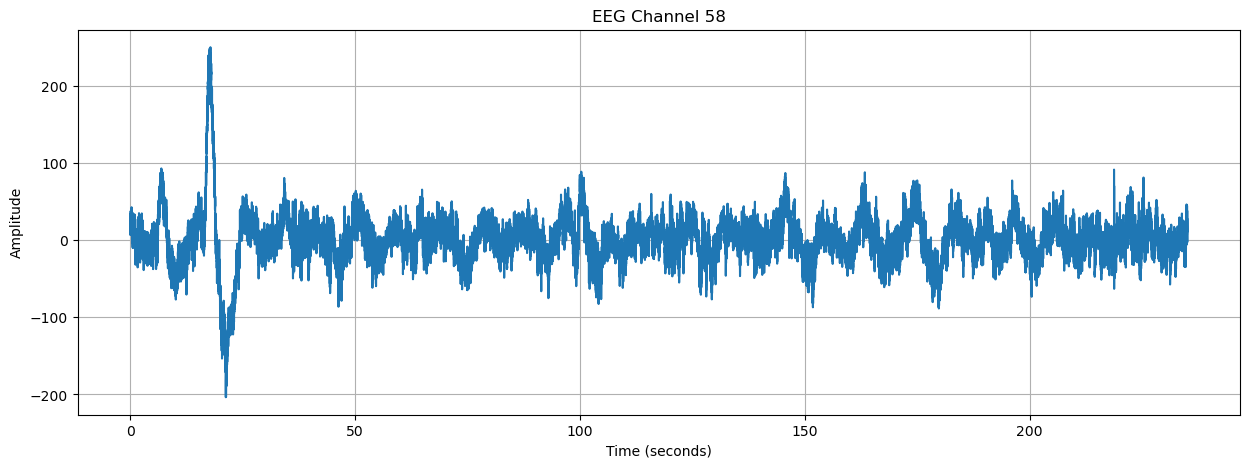

In [7]:
loader.plot_random_eeg()